### WHAT LEARNT FROM FIRST CODE:

-   I have understood the model is overfitted last time.
-   I had large number of kernels last time and my model is literally mugged up all the training samples and so the validation accuray got stucked at one point.

### MY STRATEGY AND IMPROVEMENTS : 

-  Reducing number of channels - parameters also decreased.
-  Introducing Batch Normalization so that it will bring the values between -1 to 1 and so the kernels looks the better receptive field.
-  Changing batch size to 64 so that i can reduce the epochs time and also model do learn better seeing large number of images.

### Target 

Reach validation accuracy more than **99.4 with out considering the number of parameters** , Should not use dropout or any learning rate schedular.

    -  ACHIEVED 99.480 in 12th EPOCH.

#### TOOLS USED AND OBSERVATIONS 

-   I have just used the same pattern with channels size increased to 128 using 3x3 kernel and decreased to 64 using 1x1 kernel, all the time used batch normalization inbetween.
-  Used Batch Normalization, No Dropout, No Learning rate schedular.
-  I have never cared about parameters and used a whopping 3,71,914 parameters.
-  Using batch size = 64, and the Training accuracies are clearly increasing from 96.7 to 99.9.
-   I have ran for 50 epochs and the validation accuracy reached the **MAXIMUM OF 99.480 in 12th epoch**



In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


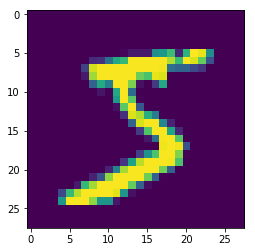

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1))) # Receptive field : 3x3 , Resolution output : 26x26x128
model.add(BatchNormalization(name='norm_1'))
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 3x3 , Resolution output : 26x26x64

model.add(Convolution2D(128, 3, 3, activation='relu')) # Receptive field : 5x5 , Resolution output : 24x24x128
model.add(BatchNormalization(name='norm_2'))
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 5x5 , Resolution output : 24x24x64

model.add(Convolution2D(128, 3, 3, activation='relu')) # Receptive field : 7x7 , Resolution output : 22x22x128
model.add(BatchNormalization(name='norm_3'))
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 7x7 , Resolution output : 22x22x64

model.add(MaxPooling2D(pool_size=(2,2))) # Receptive field : 14x14 , Resolution output : 11x11x64

model.add(Convolution2D(128, 3, 3, activation='relu')) # Receptive field : 16x16 , Resolution output : 9x9x128
model.add(BatchNormalization(name='norm_4'))
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 16x16 , Resolution output : 9x9x64

model.add(Convolution2D(128, 3, 3, activation='relu')) # Receptive field : 18x18 , Resolution output : 7x7x128
model.add(BatchNormalization(name='norm_5'))
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 18x18 , Resolution output : 7x7x64

model.add(Convolution2D(10, 7, 7)) # Resolution output : 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 26, 26, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 24, 24, 128)       512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 128)       73856     
__________

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!wget https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
from clr_callback import *

--2019-05-20 13:10:38--  https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5326 (5.2K) [text/plain]
Saving to: ‘clr_callback.py.3’

clr_callback.py.3   100%[===================>]   5.20K  --.-KB/s    in 0s      

2019-05-20 13:10:38 (68.6 MB/s) - ‘clr_callback.py.3’ saved [5326/5326]



In [0]:
filepath="/content/gdrive/My Drive/Raajesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 458us/step - loss: 0.1040 - acc: 0.9676 - val_loss: 0.0531 - val_acc: 0.9853

Epoch 00001: val_acc improved from -inf to 0.98530, saving model to /content/gdrive/My Drive/Raajesh-01-0.99.hdf5
Epoch 2/50
60000/60000 [==============================] - 24s 408us/step - loss: 0.0414 - acc: 0.9873 - val_loss: 0.0360 - val_acc: 0.9883

Epoch 00002: val_acc improved from 0.98530 to 0.98830, saving model to /content/gdrive/My Drive/Raajesh-02-0.99.hdf5
Epoch 3/50
60000/60000 [==============================] - 25s 412us/step - loss: 0.0289 - acc: 0.9911 - val_loss: 0.0434 - val_acc: 0.9882

Epoch 00003: val_acc did not improve from 0.98830
Epoch 4/50
60000/60000 [==============================] - 24s 405us/step - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0440 - val_acc: 0.9873

Epoch 00004: val_acc did not improve from 0.98830
Epoch 5/50


In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-12-0.99.hdf5')

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.022167634683228927, 0.9948]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.5769641e-15 2.7399881e-15 3.7148171e-09 2.7764815e-12 2.1274007e-17
  1.5276241e-15 4.8698928e-24 1.0000000e+00 2.5432638e-16 3.1107397e-12]
 [1.0704648e-10 5.0851684e-10 1.0000000e+00 2.3783825e-15 5.2444072e-14
  1.0019058e-14 1.8369591e-09 5.2263051e-17 1.5847563e-14 2.1989827e-14]
 [3.3029729e-10 1.0000000e+00 1.2524996e-08 1.0592786e-12 5.8135203e-09
  1.0021975e-08 1.4565563e-09 3.5913491e-08 2.4057855e-11 1.2353520e-10]
 [9.9999988e-01 3.0035735e-17 1.0276827e-13 2.9852543e-15 2.6220311e-11
  1.9304424e-11 4.6378252e-09 3.3058102e-13 1.3646992e-11 8.7312451e-08]
 [1.8420962e-16 2.7099768e-16 1.0772396e-15 7.0330846e-17 1.0000000e+00
  2.7900647e-17 7.8206408e-15 1.2894837e-15 1.0450498e-13 4.5077192e-10]
 [3.5746538e-11 9.9999964e-01 3.0507539e-07 1.5275428e-14 2.4839888e-08
  1.2273069e-11 7.7712420e-11 2.9585323e-08 4.1810336e-12 7.5658285e-10]
 [2.7025355e-22 5.0600635e-09 3.5380243e-12 2.5075894e-17 1.0000000e+00
  1.6950147e-14 1.3940821e-17 1.8548764e-09 1.9447244e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()